# Guided Practice.
 ----

  University: UTEC \\
  Course: Artificial Intelligence \\
  Professor: Cristian López Del Alamo \\
  Topic: Linear Regression \\

 ----
Participants (G8):
*   Adrian Sandoval Huamani
*   Jeffrey Antonio Monja Castro
*   Jeysson David Arévalo Mendoza



## NOTE: Make a copy of this Colab to work on your own computer.

1. In this practice, you are asked to conduct tests using different loss functions.

2. Your team should implement the machine learning algorithm for linear regression and perform the corresponding tests on the following [Dataset](https://drive.google.com/file/d/1W60C0Vkqx6qWhIZLADezokQugMwmfb22/view?usp=sharing).

3. You should select 70% of the Dataset for training and 30% for testing. Remember that both training and testing data must be taken randomly.

4. Use the following loss functions for comparisons. Additionally, remember that the derivatives will change each time you change the loss function.

   * MSE Loss Function \\

     $MSE = \frac{1}{2m}\sum_{i=0}^m (y_i - h(x_i))^2$ \\

   * MAE Loss Function \\

     $MAE = \frac{1}{m}\sum_{i=0}^m |y_i - h(x_i)|$ \\

   There are other loss functions in regression. Try, at home, with these other two functions.
   * Huber Loss Function \\

     \begin{align}
     L(y,h(x)) = \left\{ \begin{array}{cl}
     \frac{1}{2} \left[y-h(x)\right]^2 & \text{for }|y-h(x)| \le \delta, \\
     \delta \left(|y-h(x)|-\delta/2\right) & \text{otherwise.}
     \end{array}\right.
     \end{align} \\

   * Log Cosh Loss \\

     $LCE = \sum_{i=0}^m \log(\cosh(y_i - h(x_i)))$ \\


# Comparative Plot of Loss Functions.

Fuente: https://programmerclick.com/article/23511327338/

 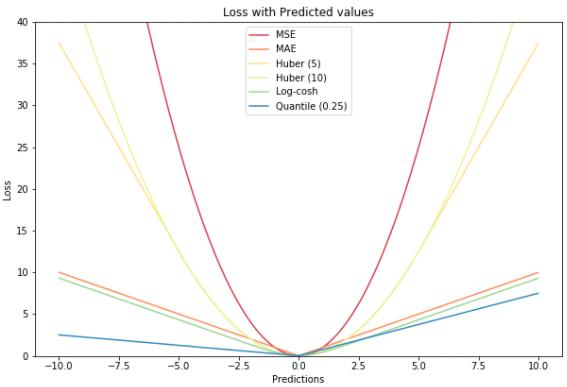

In [ ]:
%pip install numpy
%pip install matplotlib
%pip install pandas

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd


In [104]:
# From VsCode, they aren't needed
# from google.colab import drive
# drive.mount('/content/drive')

* **Read the database** and, if necessary, perform a cleaning step. This may involve removing columns with very few data points or rows with many missing values. In some cases, it may also be possible to interpolate data to fill in missing information.


* **Exploratory Data Analysis (EDA):** is a crucial step in data visualization and data analysis. It involves using various techniques to understand and summarize the main characteristics of a dataset before applying more complex statistical analyses or machine learning models.





Text(0.5, 1.0, 'Gráfico de ingreso vs felicidad')

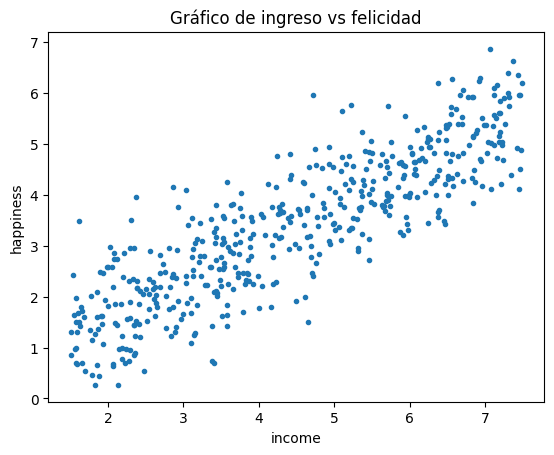

In [13]:
# Read the dataset
# dataset = pd.read_csv('/content/drive/MyDrive/UTEC/CURSOS/2022.2/Inteligencia Artificial/DataSet/Practica/db.csv')
dataset = pd.read_csv('./db.csv')
x = (dataset[['income']]).to_numpy()
y = (dataset[['happiness']]).to_numpy()

# Normalizing
# max - xi / max - min
# x = (np.max(x) - x) / (np.max(x) - np.min(x))
# y = (np.max(y) - y) / (np.max(y) - np.min(y))


# Exploratory Data Analysisa
plt.plot(x,y,'.')
plt.xlabel('income')
plt.ylabel('happiness')
plt.title('Gráfico de ingreso vs felicidad')

#Data Preparation

* Separate a portion of the data for training and another portion for validation/testing. In this case, 70/30.

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)


# Modelo
$h(x_i) = x_i*w + b$

In [5]:
def h(x, w, b):
    return w*x + b

# Loss function
$\mathcal{L} = \frac{1}{2n}\sum_{i=0}^n (y_i - h(x_i))^2$

In [6]:
def Error(x, y, w, b): 
    """
    x: income
    y: happiness
    w, b: from the model y = w*x + b
    """ 
    n = len(x)

    return (1/(2*n) * np.sum((y - h(x, w, b))**2))



# Cálculo de derivadas
$db = \frac{1}{n}\sum_{i=0}^n(y_i - h(x_i))(-1)$

$dw = \frac{1}{n}\sum_{i=0}^n(y_i - h(x_i))(-x_i)$

In [7]:
def derivada(x, y, w, b):
    # write your code here
    n = len(x)

    db = (1/n) * np.sum(((y) - h(x, w, b)) * (-1))
    dw = (1/n) * np.sum(((y) - h(x, w, b))* (-x))

    return db, dw


# Actualiación de parámetros

$h(x_i) = b + x_i*w $

$w  = w - \alpha*\frac{\partial L}{\partial w} $

$b  = b - \alpha*\frac{\partial L}{\partial b} $


In [8]:
def update(w, b, alfa, db, dw):
    # write your code here
    w = w - alfa * dw
    b = b - alfa * db
    return b, w

# Training

In [9]:
def train(x, y, alfa, epochs):
    np.random.seed(2001)
    w = np.random.rand()
    b = np.random.rand()
    L = Error(x, y, w, b)
    loss = []
    for i in range(epochs):
        db, dw = derivada(x, y, w, b)
        b, w = update(w, b, alfa, db, dw)
        L = Error(x, y, w, b)
        print(L)
        loss.append(L)
    return b, w, loss


def Plot_Loss(epochs,loss):
    plt.plot(epochs, loss)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss Function')


# Testing

In [46]:
def test(x,y,w,b):
    ypred = h(x, w, b)
    error = Error(x, y, w, b)
    print(error)
    plt.plot(x, ypred, 'o', color='red')
    plt.show()


3.882063048714476
3.7088635233307548
3.543961001528057
3.3869580210030605
3.2374761596132897
3.0951551232711823
2.959651877531969
2.8306398207822436
2.7078079970363773
2.5908603464433724
2.4795149916976875
2.373503558634056
2.272570529368754
2.1764726264281915
2.0849782263804024
1.997866801556123
1.9149283885138373
1.8359630819676465
1.7607805529581744
1.6891995901051728
1.6210476628361015
1.5561605055379522
1.4943817216299913
1.4355624066031325
1.3795607891173465
1.3262418892920576
1.2754771933659064
1.2271443439417147
1.1811268450700516
1.1373137814605754
1.0955995511443595
1.0558836109428518
1.0180702341299672
0.9820682797032154
0.9477909727077329
0.9151556950837512
0.8840837865333651
0.8545003549266474
0.8263340957901331
0.7995171204425762
0.7739847923637528
0.7496755714019036
0.7265308654443107
0.704494889193497
0.6835145297086536
0.6635392183882153
0.6445208090850214
0.6264134620602885
0.6091735334966883
0.5927594703042278
0.5771317099653783
0.5622525851780603
0.5480862330666354


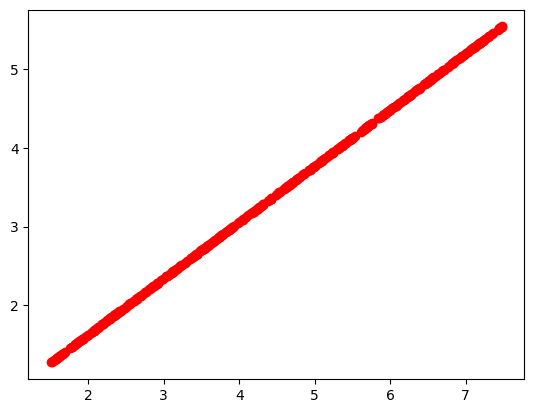

In [47]:
epochs = 1000
b, w, loss = train(x_train, y_train, 0.001, epochs)

print("Average error:", np.average(loss))

test(x, y, w, b)

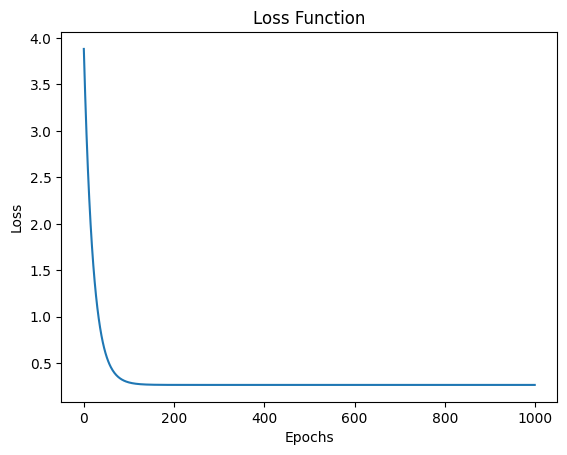

In [45]:
Plot_Loss(range(epochs), loss)

After Executing the Practice
If your model converges, do you notice that the error value fluctuates, going up and down? If so, what do you think could be causing this behavior?

Now, transform the values of X and Y to be within the range [0,1], that is, normalize the data using the following equation: v = (v - min) / (max - min), where v can be either x or y, depending on which variable you are normalizing. Then, run your code again.

If your code is correct, you should observe that the error function decreases more steadily. Why do you think this happens?

What is the average training error of your model?

What is the average testing error of your model?

Plot the evolution of the training error over time.

Train your model with different values of α {0.5, 0.1, 0.01, 0.001, 0.00001} and, after training, check the average error on the corresponding tests.

What happens when the value of α is close to 1, and what happens if it is very small?